In [4]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

peru_pos = pd.read_csv('positivos_covid.csv', 
                    encoding='latin-1', parse_dates=['FECHA_RESULTADO'])
peru_fall = pd.read_csv('fallecidos_covid.csv', 
                    encoding='latin-1', parse_dates=['FECHA_FALLECIMIENTO'])

In [26]:
peru_fall.head()

,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,a3f91b4893446f471ec1c079f28ba20b,2020-06-02,1,MASCULINO,20190205.0,LIMA,LIMA,LA VICTORIA
1,8960c1b9f3c9289271b41c4a7c0d33f6,2020-06-02,41,MASCULINO,19780811.0,LIMA,LIMA,VILLA EL SALVADOR
2,36497739152c2ae26703c1eca9acf537,2020-06-02,72,MASCULINO,19471001.0,ANCASH,SANTA,NUEVO CHIMBOTE
3,627171bd69f18c257468bca6cb0aeff0,2020-06-02,49,MASCULINO,19700910.0,ANCASH,SANTA,CHIMBOTE
4,2b20dcb481a39590c87752156e2a9e32,2020-06-02,26,MASCULINO,19931017.0,LIMA,LIMA,LOS OLIVOS


In [6]:
peru_fall.isna().sum()

UUID                      0
FECHA_FALLECIMIENTO       0
EDAD_DECLARADA            0
SEXO                      0
FECHA_NAC              1269
DEPARTAMENTO              0
PROVINCIA              1279
DISTRITO                749
dtype: int64

In [7]:
peru_pos.isna().sum()

UUID                0
DEPARTAMENTO        0
PROVINCIA           0
DISTRITO            0
METODODX            0
EDAD               74
SEXO                0
FECHA_RESULTADO     0
dtype: int64

In [8]:
(len(peru_pos.loc[peru_pos.DISTRITO == "EN INVESTIGACIÓN"]) / len(peru_pos)) *100

5.011095516100786

In [9]:
(len(peru_fall.loc[peru_fall.DISTRITO == "EN INVESTIGACIÓN"]) / len(peru_fall)) *100

0.0

Text(0.5, 1.0, 'Deaths in Peru by Department')

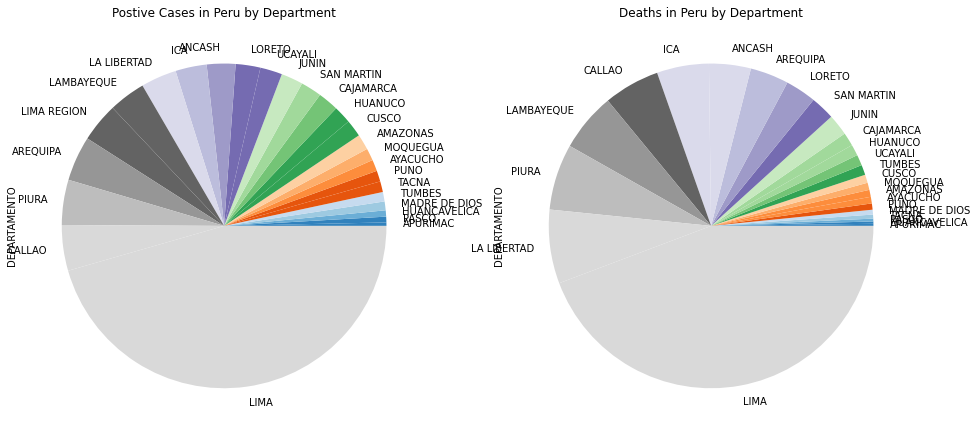

In [10]:
fig = plt.figure(figsize= (16, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

peru_pos.groupby("DEPARTAMENTO").DEPARTAMENTO.count().sort_values().plot.pie(cmap="tab20c", ax=ax1)
ax1.set_title("Postive Cases in Peru by Department")
peru_fall.groupby("DEPARTAMENTO").DEPARTAMENTO.count().sort_values().plot.pie(cmap="tab20c", ax=ax2)
ax2.set_title("Deaths in Peru by Department")

In [11]:
puno_pos = peru_pos[peru_pos.DEPARTAMENTO == "PUNO"]
puno_fall = peru_fall[peru_fall.DEPARTAMENTO == "PUNO"]

Text(0.5, 0, 'Date')

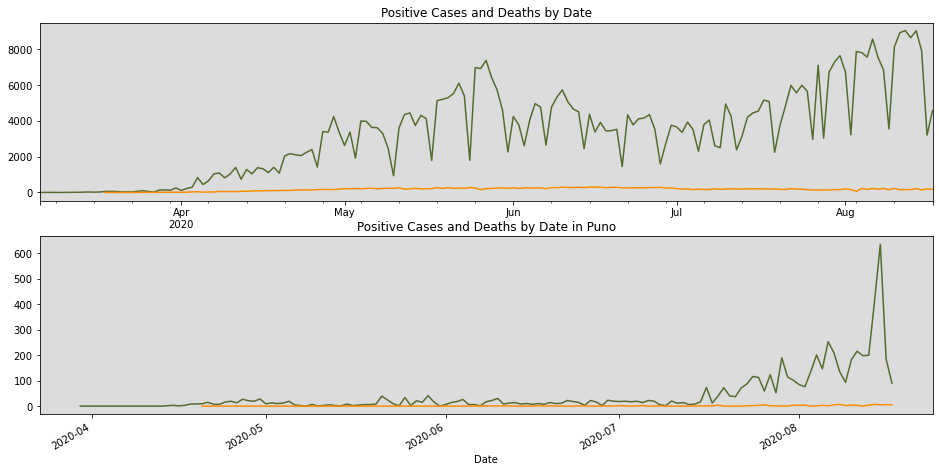

In [12]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


peru_pos.groupby("FECHA_RESULTADO").FECHA_RESULTADO.count().plot(kind="line", x = "FECHA_RESULTADO", ax=ax1, color = "darkolivegreen")
peru_fall.groupby("FECHA_FALLECIMIENTO").FECHA_FALLECIMIENTO.count().plot(kind="line", x = "FECHA_FALLECIMIENTO", ax=ax1, color= "darkorange")
ax1.set_title("Positive Cases and Deaths by Date")
ax1.set_facecolor("gainsboro")
ax1.set_xlabel('')

puno_pos.groupby("FECHA_RESULTADO").FECHA_RESULTADO.count().plot(kind="line", x = "FECHA_RESULTADO", ax=ax2, color = "darkolivegreen")
puno_fall.groupby("FECHA_FALLECIMIENTO").FECHA_FALLECIMIENTO.count().plot(kind="line", x = "FECHA_FALLECIMIENTO", ax=ax2, color= "darkorange")
ax2.set_title("Positive Cases and Deaths by Date in Puno")
ax2.set_facecolor("gainsboro")
ax2.set_xlabel('Date')

Text(0.5, 1.0, 'Puno Deaths Only')

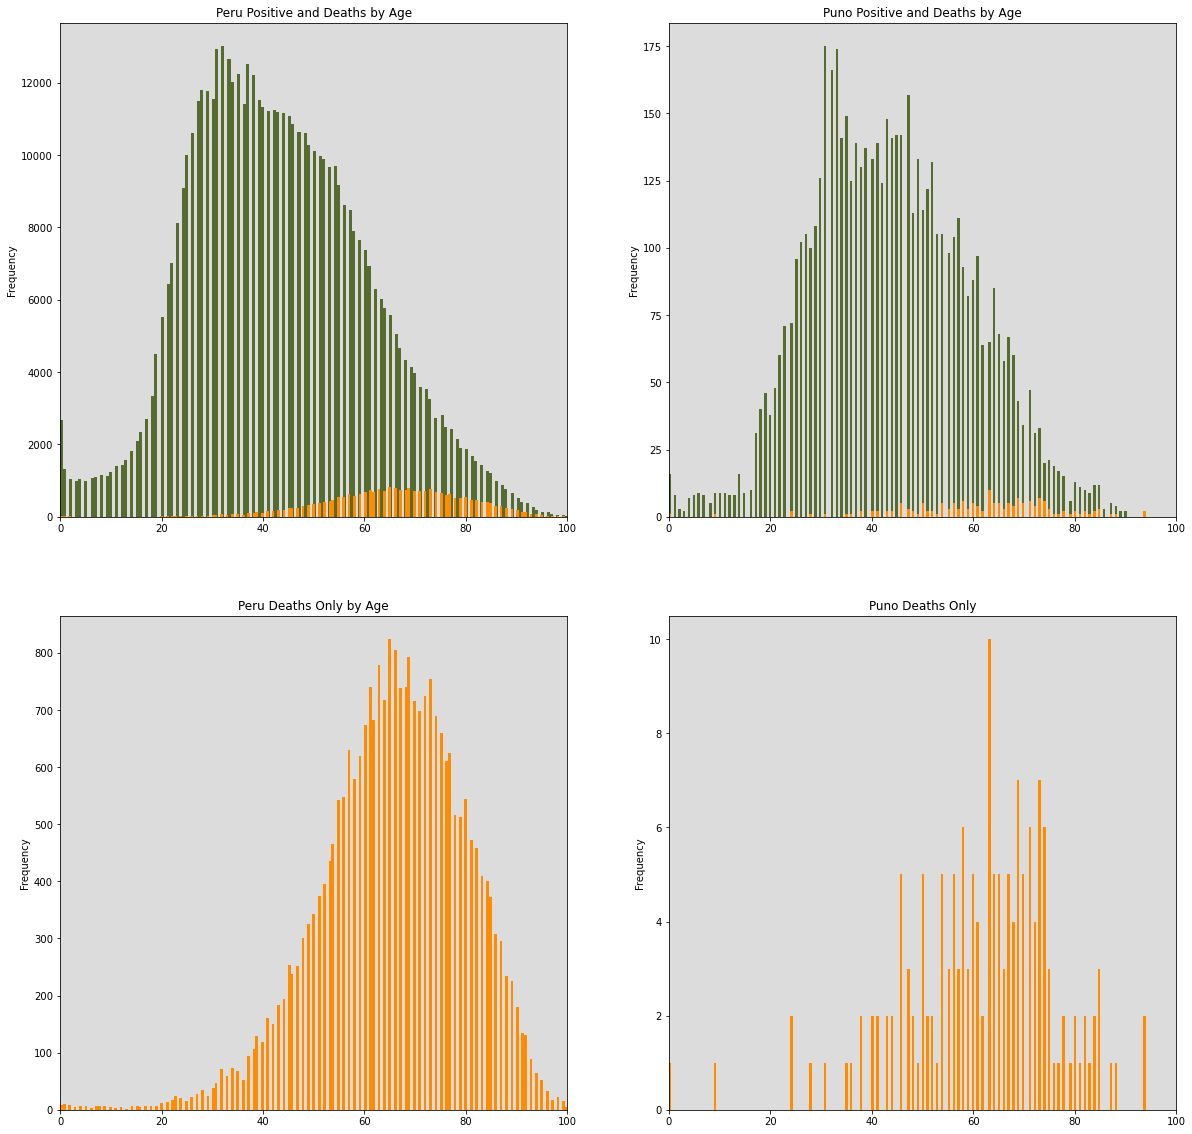

In [13]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

peru_pos.EDAD.plot(kind='hist', y='EDAD', color = "darkolivegreen", bins=200, ax=ax1)
peru_fall.EDAD_DECLARADA.plot(kind='hist', y='EDAD', color= "darkorange", bins=200, ax=ax1)
ax1.set_xlim((0,100))
ax1.set_facecolor("gainsboro")
ax1.set_title("Peru Positive and Deaths by Age")

peru_fall.EDAD_DECLARADA.plot(kind='hist', y='EDAD', color= "darkorange", bins=200, ax=ax3)
ax3.set_xlim((0,100))
ax3.set_facecolor("gainsboro")
ax3.set_title("Peru Deaths Only by Age")

puno_pos.EDAD.plot(kind='hist', y='EDAD', color = "darkolivegreen", bins=200, ax=ax2)
puno_fall.EDAD_DECLARADA.plot(kind='hist', y='EDAD', color= "darkorange", bins=200, ax=ax2)
ax2.set_xlim((0,100))
ax2.set_facecolor("gainsboro")
ax2.set_title("Puno Positive and Deaths by Age")

puno_fall.EDAD_DECLARADA.plot(kind='hist', y='EDAD', color= "darkorange", bins=200, ax=ax4)
ax4.set_xlim((0,100))
ax4.set_facecolor("gainsboro")
ax4.set_title("Puno Deaths Only")

Text(0.5, 1.0, 'Puno Deaths by Sex')

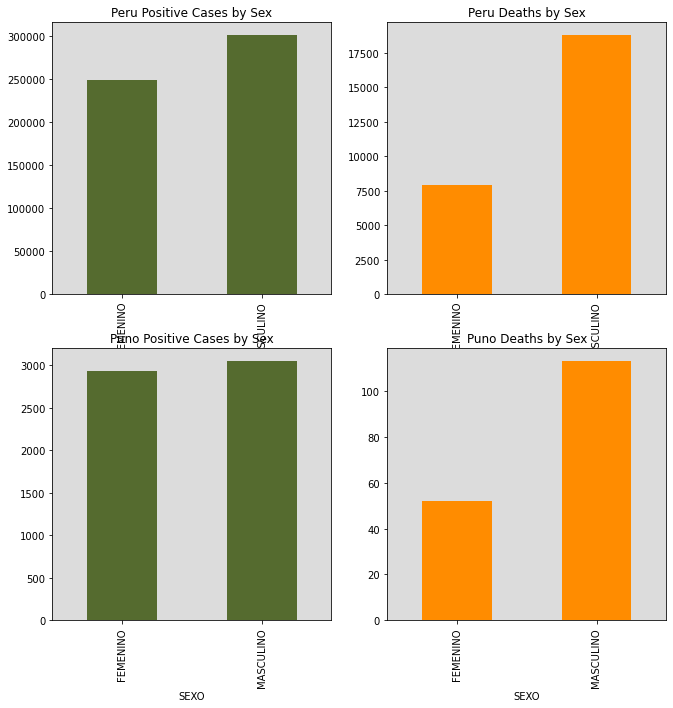

In [14]:
fig = plt.figure(figsize=(11, 11))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

peru_pos.groupby('SEXO').SEXO.count().plot.bar(ax=ax1, color='darkolivegreen')
ax1.set_facecolor("gainsboro")
ax1.set_title("Peru Positive Cases by Sex")

peru_fall.groupby('SEXO').SEXO.count().plot.bar(ax=ax2, color= "darkorange")
ax2.set_facecolor("gainsboro")
ax2.set_title("Peru Deaths by Sex")

puno_pos.groupby('SEXO').SEXO.count().plot.bar(ax=ax3, color='darkolivegreen')
ax3.set_facecolor("gainsboro")
ax3.set_title("Puno Positive Cases by Sex")

puno_fall.groupby('SEXO').SEXO.count().plot.bar(ax=ax4, color= "darkorange")
ax4.set_facecolor("gainsboro")
ax4.set_title("Puno Deaths by Sex")

In [15]:
posdata = peru_pos.groupby('SEXO').SEXO.count().rename(index={'FEMENINO': 'Positive F', 'MASCULINO': 'Positive M'}).rename_axis(['Sex'], axis=0)
dedata = peru_fall.groupby('SEXO').SEXO.count().rename(index={'FEMENINO': 'Deaths F', 'MASCULINO': 'Deaths M'}).rename_axis(['Sex'], axis=0)


Text(0.5, 0, 'Date')

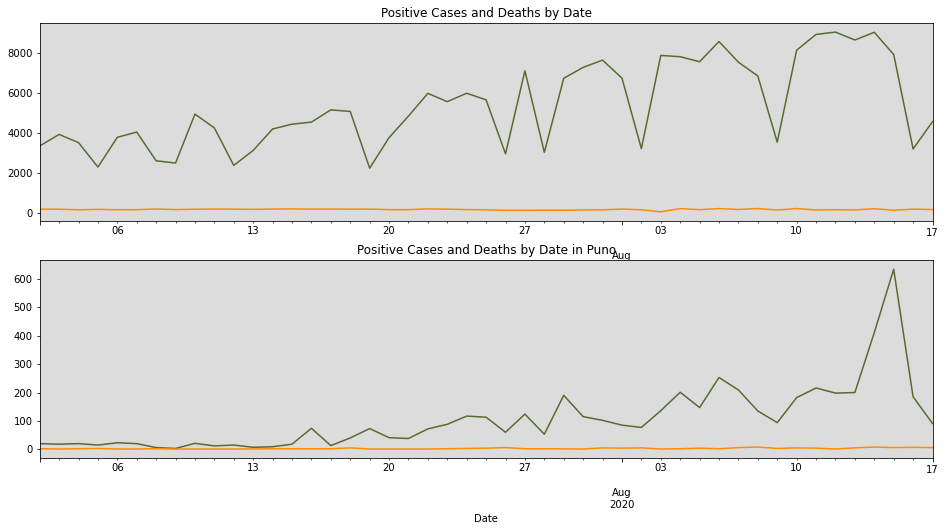

In [29]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


peru_pos[peru_pos['FECHA_RESULTADO'] > '2020-07-01'].groupby("FECHA_RESULTADO").FECHA_RESULTADO.count().plot(kind="line", x = "FECHA_RESULTADO", ax=ax1, color = "darkolivegreen")
peru_fall[peru_fall['FECHA_FALLECIMIENTO'] > '2020-07-01'].groupby("FECHA_FALLECIMIENTO").FECHA_FALLECIMIENTO.count().plot(kind="line", x = "FECHA_FALLECIMIENTO", ax=ax1, color= "darkorange")
ax1.set_title("Positive Cases and Deaths by Date")
ax1.set_facecolor("gainsboro")
ax1.set_xlabel('')

puno_pos[puno_pos['FECHA_RESULTADO'] > '2020-07-01'].groupby("FECHA_RESULTADO").FECHA_RESULTADO.count().plot(kind="line", x = "FECHA_RESULTADO", ax=ax2, color = "darkolivegreen")
puno_fall[puno_fall['FECHA_FALLECIMIENTO'] > '2020-07-01'].groupby("FECHA_FALLECIMIENTO").FECHA_FALLECIMIENTO.count().plot(kind="line", x = "FECHA_FALLECIMIENTO", ax=ax2, color= "darkorange")
ax2.set_title("Positive Cases and Deaths by Date in Puno")
ax2.set_facecolor("gainsboro")
ax2.set_xlabel('Date')